In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

sns.set_context("notebook", rc={"lines.linewidth": 3})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [62]:
cate = "primaryNivo"
gsva = pd.read_csv(f"gsva_result/gsva_c2kegg_pathway_{cate}.txt",sep="\t")

In [69]:
term = "closeness"
#df_eigne_centrality = pd.read_csv(f"topolgy_property/c2_pathway_edgebetween_{cate}.txt")
#df_eigne_centrality = pd.read_csv(f"topolgy_property/c2_pathway_eigne_centrality_{cate}.txt")
df_eigne_centrality = pd.read_csv(f"topolgy_property/c2_pathway_closeness_{cate}.txt")

#print(df_eigne_centrality)
df_eigne_centrality.set_index("pathway",inplace=True)

def trans_alist(alist):
    if type(alist) == int:
        return 0
    if type(alist) == float:
        return 0
    elif len(alist) > 0:
        thelist = alist.split("_")
        thelist = pd.Series(thelist)
        if thelist.sum() == 0:
            return 0
        else:
            return thelist.astype('float').sum()/thelist.count()
    else:
        return 0
        
df_eigne_centrality.fillna(0,inplace=True)
df_ave= df_eigne_centrality.applymap(trans_alist).copy()

term = "edge_entropy"
df_eigne_centrality = pd.read_csv(f"c2kegg_pathway_edge_entropy_primaryNivo.txt",sep="\t")
df_eigne_centrality.columns = ["pathway"] + df_eigne_centrality.columns.tolist()[1:]
df_eigne_centrality.set_index("pathway",inplace=True)
df_ave= df_eigne_centrality.T.copy()
df_ave.reset_index()

In [70]:
gsva.reset_index()

,index,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,G138701_RCCBMS-00053-T_v1_RNA_OnPrem,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,G138701_RCCBMS-00057-T_v1_RNA_OnPrem,...,P66451-07A-Run1_S15_L002,P66287-02A-Run1_S5_L001,P66282-03D-Run1_S11_L001,P66287-11B-Run1_S21_L002,EA639040,P66507-04D-Run1_S3_L001,P66507-07G-Run1_S17_L002,P66425-03B-Run1_S10_L001,EA639069,P66282-11G-Run1_S20_L002
0,KEGG_ABC_TRANSPORTERS,-0.379350,-0.412868,-0.347130,-0.537958,-0.316890,-0.335022,-0.279472,-0.271055,-0.459766,...,-0.249999,-0.335518,-0.522977,-0.264549,-0.416532,0.204093,-0.251688,-0.395281,-0.322629,-0.342147
1,KEGG_ACUTE_MYELOID_LEUKEMIA,-0.268321,-0.360003,-0.173644,-0.140490,0.262062,0.227249,-0.376905,-0.348860,-0.235486,...,0.183198,0.269795,-0.274751,-0.339729,-0.238400,-0.299877,-0.310445,0.277889,0.242118,0.320369
2,KEGG_ADHERENS_JUNCTION,-0.259717,-0.291381,-0.250026,0.277468,0.307379,-0.286783,-0.327405,-0.441351,-0.199769,...,-0.289592,-0.219266,0.254040,-0.363550,-0.421879,-0.410653,-0.413267,0.290724,0.206268,-0.277723
3,KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,-0.250178,-0.371819,-0.392857,-0.321886,-0.332566,-0.172443,-0.351262,-0.425804,-0.321953,...,-0.224945,-0.243311,-0.420703,-0.354814,-0.374470,-0.377607,-0.296119,-0.286190,-0.333428,-0.404149
4,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,0.273295,-0.265317,0.199316,0.300137,-0.466255,-0.370032,0.348205,-0.243377,-0.189903,...,0.394410,-0.429116,-0.232685,-0.514323,0.413876,-0.218874,0.208962,-0.252851,-0.315519,-0.704411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION,-0.327588,0.173327,-0.262227,0.269657,0.270349,-0.251416,-0.290364,-0.517444,-0.317276,...,0.345492,0.249448,0.301713,-0.469592,-0.273357,-0.310280,-0.420861,0.426521,0.363494,-0.312423
182,KEGG_VEGF_SIGNALING_PATHWAY,-0.178303,-0.312830,0.221436,-0.191483,0.279933,0.178195,-0.314269,-0.302991,-0.217321,...,-0.186997,0.290021,-0.288887,-0.231272,-0.188634,-0.239951,-0.253244,0.176227,-0.266833,0.282602
183,KEGG_VIBRIO_CHOLERAE_INFECTION,-0.377566,-0.305356,0.260078,-0.326445,-0.301683,-0.248369,-0.332849,-0.527073,-0.410747,...,0.386937,-0.274857,-0.173966,-0.518787,-0.376314,-0.471507,-0.397414,-0.278819,-0.404454,-0.294406
184,KEGG_VIRAL_MYOCARDITIS,0.234034,-0.269645,0.214023,-0.167722,0.312858,0.180858,-0.376652,-0.349057,-0.322375,...,-0.372185,0.307558,0.213233,-0.300421,-0.262599,-0.423474,0.200972,-0.238297,-0.206465,0.265707


In [71]:
pd.merge(gsva.reset_index(),df_ave.reset_index(),how="inner",left_on="index",right_on="pathway")

,index,G138701_RCCBMS-00020-T_v1_RNA_OnPrem_x,G138701_RCCBMS-00097-T_v1_RNA_OnPrem_x,G138701_RCCBMS-00141-T_v1_RNA_OnPrem_x,G138701_RCCBMS-00099-T_v1_RNA_OnPrem_x,G138701_RCCBMS-00163-T_v1_RNA_OnPrem_x,G138701_RCCBMS-00053-T_v1_RNA_OnPrem_x,G138701_RCCBMS-00116-T_v1_RNA_OnPrem_x,G138701_RCCBMS-00136-T_v1_RNA_OnPrem_x,G138701_RCCBMS-00057-T_v1_RNA_OnPrem_x,...,P66507-04A-Run1_S1_L001_y,P66507-04D-Run1_S3_L001_y,P66507-07F-Run1_S16_L002_y,P66507-07G-Run1_S17_L002_y,P66507-08D-Run1_S20_L002_y,P66511-01E-Run1_S17_L002_y,P66511-05E-Run1_S11_L001_y,P66511-06G-Run1_S16_L001_y,P66511-07H-Run1_S19_L002_y,P66511-09B-Run1_S26_L002_y
0,KEGG_ABC_TRANSPORTERS,-0.379350,-0.412868,-0.347130,-0.537958,-0.316890,-0.335022,-0.279472,-0.271055,-0.459766,...,0.459978,0.523415,0.508539,0.371583,0.524675,0.418916,0.358678,0.370198,0.415791,0.453619
1,KEGG_ACUTE_MYELOID_LEUKEMIA,-0.268321,-0.360003,-0.173644,-0.140490,0.262062,0.227249,-0.376905,-0.348860,-0.235486,...,0.641058,0.682315,0.820606,0.563230,0.771921,0.763199,0.678346,0.731408,0.741743,0.609672
2,KEGG_ADHERENS_JUNCTION,-0.259717,-0.291381,-0.250026,0.277468,0.307379,-0.286783,-0.327405,-0.441351,-0.199769,...,0.556991,0.541718,0.596623,0.582064,0.580265,0.570761,0.712091,0.634479,0.614170,0.553648
3,KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,-0.250178,-0.371819,-0.392857,-0.321886,-0.332566,-0.172443,-0.351262,-0.425804,-0.321953,...,0.558968,0.486728,0.537388,0.501529,0.563374,0.580433,0.485640,0.386529,0.611412,0.691496
4,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,0.273295,-0.265317,0.199316,0.300137,-0.466255,-0.370032,0.348205,-0.243377,-0.189903,...,0.892957,0.561763,0.735736,0.271412,0.570025,0.848618,0.769303,0.714166,0.792289,0.299021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION,-0.327588,0.173327,-0.262227,0.269657,0.270349,-0.251416,-0.290364,-0.517444,-0.317276,...,0.530074,0.460992,0.583582,0.575138,0.560175,0.569186,0.544388,0.464887,0.581051,0.403690
182,KEGG_VEGF_SIGNALING_PATHWAY,-0.178303,-0.312830,0.221436,-0.191483,0.279933,0.178195,-0.314269,-0.302991,-0.217321,...,0.476096,0.478643,0.656728,0.570410,0.579293,0.554952,0.555649,0.593508,0.598795,0.493006
183,KEGG_VIBRIO_CHOLERAE_INFECTION,-0.377566,-0.305356,0.260078,-0.326445,-0.301683,-0.248369,-0.332849,-0.527073,-0.410747,...,0.761550,0.938396,0.865346,0.708948,0.719979,0.745271,0.861443,0.973971,0.992727,0.738834
184,KEGG_VIRAL_MYOCARDITIS,0.234034,-0.269645,0.214023,-0.167722,0.312858,0.180858,-0.376652,-0.349057,-0.322375,...,0.662238,0.694419,0.657435,0.610837,0.608476,0.648842,0.741161,0.625934,0.627461,0.486180


In [72]:
gsva.index

Index(['KEGG_ABC_TRANSPORTERS', 'KEGG_ACUTE_MYELOID_LEUKEMIA',
       'KEGG_ADHERENS_JUNCTION', 'KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY',
       'KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM',
       'KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION',
       'KEGG_ALLOGRAFT_REJECTION', 'KEGG_ALPHA_LINOLENIC_ACID_METABOLISM',
       'KEGG_ALZHEIMERS_DISEASE',
       'KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM',
       ...
       'KEGG_TYROSINE_METABOLISM', 'KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS',
       'KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS',
       'KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION',
       'KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION',
       'KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION',
       'KEGG_VEGF_SIGNALING_PATHWAY', 'KEGG_VIBRIO_CHOLERAE_INFECTION',
       'KEGG_VIRAL_MYOCARDITIS', 'KEGG_WNT_SIGNALING_PATHWAY'],
      dtype='object', length=186)

In [73]:
from scipy import stats

corrmap =[]
for i in df_ave.index:
    corrtemp = []
    for j in gsva.index:
    #print(gsva.loc[i]) # df_ave.loc[i]
        corrtemp.append(stats.pearsonr(gsva.loc[i],df_ave.loc[j]).statistic)
        #print()
    corrmap.append(corrtemp)


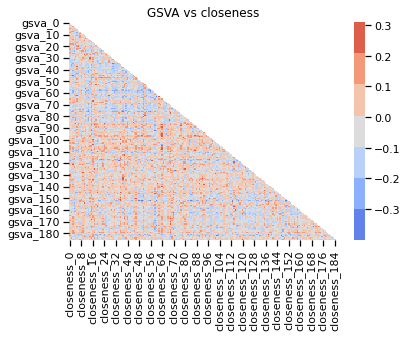

In [74]:
#f, ax = plt.subplots(figsize=(5, 5))
corr = pd.DataFrame(corrmap,columns= [f"{term}_"+str(i) for i in range(len(df_ave.index.tolist()))])
corr.index = ["gsva_"+ str(i) for i in range(len(df_ave.index.tolist()))]
mask = np.triu(np.ones_like(corr, dtype=bool))
sns_plot = sns.heatmap(corr,cmap=sns.color_palette("coolwarm", 7),mask=mask)
plt.title(f"GSVA vs {term}")
fig = sns_plot.get_figure()
fig.savefig(f"f5.{cate}_gsva2{term}.tif",bbox_inches='tight')
fig.savefig(f"f5.{cate}_gsva2{term}.svg",bbox_inches='tight')